In [ ]:
from google.colab import drive
import os
import sys
from collections import OrderedDict
import pickle
drive.mount('/content/drive')
os.chdir("./drive/MyDrive/Project/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
!pip install tweet-preprocessor
!pip install matplotlib==3.1.3

# !python -m pip install -U matplotlib
!pip install transformers
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install librosa soundfile numpy sklearn pyaudio
from transformers import RobertaTokenizer, RobertaModel
# import torch
import numpy as np
import pandas as pd
# Recommended tensorflow version is <= 2.1.0, otherwise F1 score function breaks
import tensorflow as tf
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import os
import yaml



# Exploratory Data analysis for SEMEVAL Dataset


In [ ]:
#get labels from data
def format_er(data):
    label = []
    col = list(test.columns)[2:] # get emotions
    for index, row in data.iterrows():
        lab = []
        for i in col: 
            lab.append(row[i])
        label.append(lab)
    return label 


In [ ]:
test = pd.read_csv("./BertData/2018-E-c-En-train.txt",  sep="\t")
train = pd.read_csv("./BertData/2018-E-c-En-test-gold.txt", sep="\t")
val = pd.read_csv("./BertData/2018-E-c-En-dev.txt", sep="\t")
train = train.append(test, ignore_index=True)
train = train.append(val, ignore_index=True)

train_label = format_er(train) 


In [ ]:
list(train.columns)

['ID',
 'Tweet',
 'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'love',
 'optimism',
 'pessimism',
 'sadness',
 'surprise',
 'trust']

In [ ]:
labels = list(train.columns)[2:]

In [ ]:
print('different categories: ',labels)

different categories:  ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']


# Get hashtags from twitter data

In [ ]:
import re
hashtag = train['Tweet'].apply(lambda x: re.findall(r"#(\w+)", x))
allhash = []
for i in hashtag:
    if i:
        for k in i:
            allhash.append(k)
# allhash

In [ ]:
import preprocessor as p
p.set_options(p.OPT.URL,p.OPT.MENTION) #, p.OPT.EMOJI p.OPT.MENTION
unique = labels
e = [[] for i in range(len(unique))]
for i,val in enumerate (unique):
    for k in range(len(train['Tweet'])):
        if train[val][k]==1:
            
            twt = p.clean(train['Tweet'][k].lower())
            e[i].append(twt)

In [ ]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")

anger


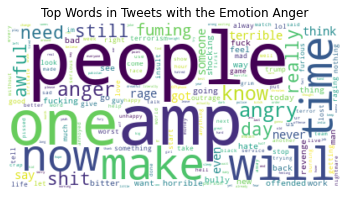

anticipation


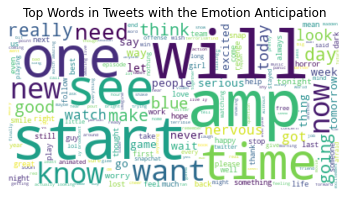

disgust


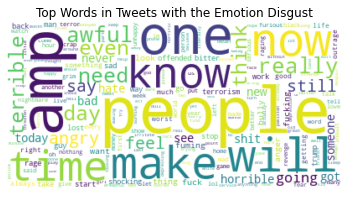

fear


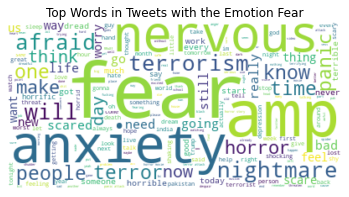

joy


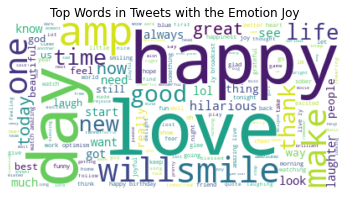

love


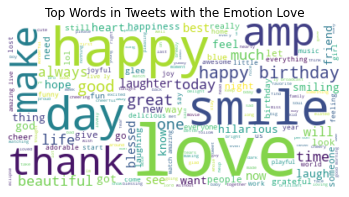

optimism


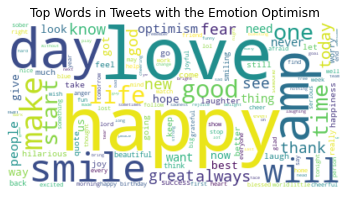

pessimism


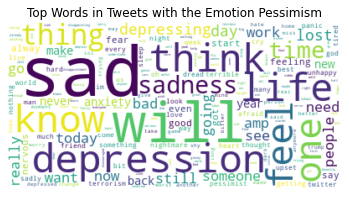

sadness


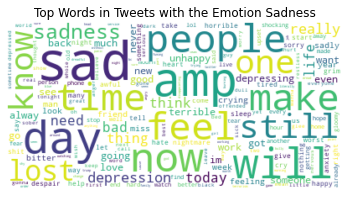

surprise


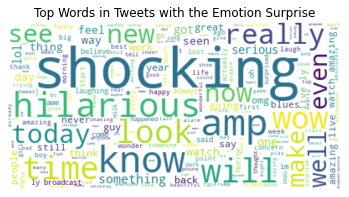

trust


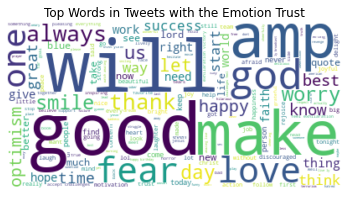

In [ ]:
clouds = []

for i in range(len(unique)):
    print(unique[i])
    wordcloud = WordCloud(background_color='white').generate(' '.join(e[i]).replace("\x92",""))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Top Words in Tweets with the Emotion {unique[i].capitalize() }")
    plt.axis("off")
    plt.show()

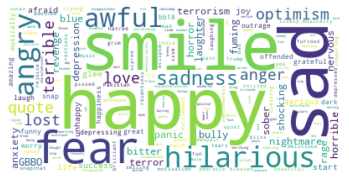

In [ ]:
clouds = []

wordcloud = WordCloud(background_color='white').generate(' '.join(allhash))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

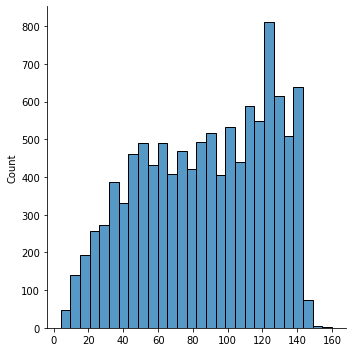

In [ ]:
import statistics 
import seaborn as sns
import nltk


allll_text = []
alll_len = []
all_seperate = []
bigrams = []
for i in range(len(train.Tweet)):
    k = p.clean(train.Tweet[i].lower())
    
    allll_text.append(k)
    alll_len.append(len(k))
    all_seperate+=k.split()
    gr = list(nltk.bigrams(k.split()))
    for i in gr:
        bigrams.append(f'{i[0]} {i[1]}')


statistics.mean(alll_len)
statistics.stdev(alll_len)

sns.displot(alll_len)


In [ ]:
from collections import Counter
# Counter = Counter(all_seperate)
# most_occur = Counter.most_common(20)
# most_occur


cn = Counter(bigrams)
most_occur = cn.most_common(20)
most_occur

[('in the', 355),
 ('of the', 299),
 ('to be', 265),
 ('on the', 203),
 ('i have', 196),
 ('i am', 173),
 ('for the', 171),
 ('to the', 169),
 ('at the', 169),
 ('and i', 164),
 ("i don't", 162),
 ('is a', 162),
 ('i was', 158),
 ('have a', 150),
 ('going to', 144),
 ('is the', 141),
 ('this is', 139),
 ('in a', 135),
 ('if you', 133),
 ('want to', 132)]

In [ ]:
cnts = []
for i in train_label:
    cnt=0
    for k in i:
        if k==1:
            cnt+=1

    cnts.append(cnt)
# cnts

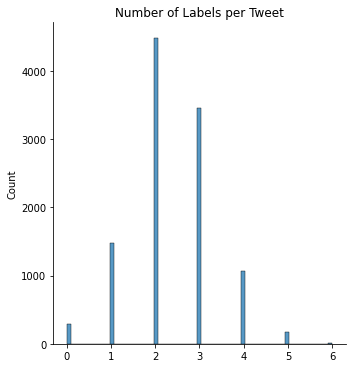

In [ ]:

# sns.displot(cnts).set_titles("Number of Labels per tweet")
sns.displot(cnts).set(title='Number of Labels per Tweet')


In [ ]:
cnts = [0 for i in range(len(labels))]
for i,val in enumerate(train_label):
    for k,val2 in enumerate(val):
        if val2==1:
            cnts[k]+=1
print(cnts)
total = len(train_label)
print(total)


[3960, 1527, 4020, 1848, 4319, 1348, 3434, 1270, 3233, 566, 553]
10983


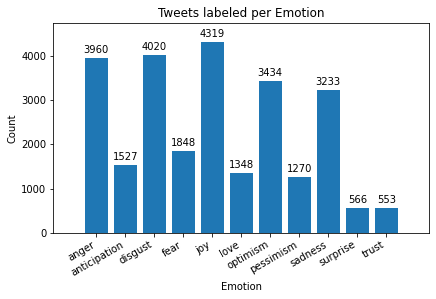

In [ ]:
import matplotlib.pyplot as plt
# bins,x
fig, ax = plt.subplots()
one = ax.bar(labels, cnts, label='Tweets labeled per Emotion')

plt.xlabel('Emotion')
plt.ylabel('Count')
ax.set_title('Tweets labeled per Emotion')
ax.bar_label(one ,padding=3)

plt.tight_layout(pad=0.5)
plt.margins(0.1)
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels


plt.show()


In [ ]:
import itertools

merged = list(itertools.chain(*e))
bins = {}
for i,val in enumerate(merged):
    merged[i]=val.replace("\x92","")
    res = len(merged[i].split())
    
    if res in bins:
        bins[res]+=1
    else:
        bins[res]=1



In [ ]:
for i in range(len(e)):
    print(unique[i],len(e[i]))

anger 3960
anticipation 1527
disgust 4020
fear 1848
joy 4319
love 1348
optimism 3434
pessimism 1270
sadness 3233
surprise 566
trust 553


# RAVDESS Data Balance

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
one = ax.bar(x, y, label='Tweets labeled per Emotion')

plt.xlabel('Emotion')
plt.ylabel('Samples')
ax.set_title('Number of Samples per Emotion')
ax.bar_label(one ,padding=3)

plt.tight_layout(pad=0.5)
plt.margins(0.1)
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels

plt.show()

x = ['neutral','calm','happy','sad','angry','fearful','disgust','surprised']
y = [96,192,192,192,192,192,192,192]

